# Proyecto - Módulo 3

08/05/2023
## Reactor de tanque de agitado continuo
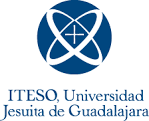

**Integrantes:**

*Alberto Marín*

  - Exp: 740526 Correo: alberto.marin@iteso.mx

*Ana Luisa Espinoza López*

  - Exp: 734753 Correo: ana.espinoza@iteso.mx


*Kevin Emiliano Ayala Montoya*

  - Exp:745973  Correo: @iteso.mx

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.optimize as opt

## Objetivos

1. **Objetivo General**
    - Simular el cambio de concentración de una solución salina en un tanque de agitación continua por medio de ecuaciones diferenciales
    

2. **Objetivos Específicos**
    - Visualizar el cambio en el volumen del tanque
    - Estimar el tiempo en que la concentración de sal es mayor mediante la optimización de funciones
    - Calcular la cantidad de sal en el tanque en cualquier tiempo (t).

## Introducción 


Las ecuaciones diferenciales son modelos matemáticos que contienen las derivadas de una función y/o de las variables que depende, describiendo la razón de cambio de estas variables dentro de la función (Sotomayor, 2021). En otras palabras, estas ecuaciones describen la variación de una variable respecto con otra; este tipo de modelo matemático se utiliza frecuentemente en áreas como ingeniería, economía, física, etc. El modelo general de la ecuación diferencial es (Franco González, 2022):
$$\frac{d^n y}{dx^n} = f(x,y,y',…, y^(n-1) ) $$

En el campo de la ingeniería, estos modelos matemáticos se utilizan para describir y representar modelos físicos transitorios en el tiempo; las ecuaciones diferenciales permiten predecir el comportamiento de un sistema físico desde una representación matemática, de modo que se pueda facilitar el diseño de sistemas estables y mejorarlos (Espinoza, 2020).  De acuerdo con Tenorio et al. (2013), la información del fenómeno se traduce a un lenguaje matemático (en este caso ecuaciones diferenciales), para posteriormente tratar el modelo obtenido derivando en una solución, la cuál se interpreta en términos del campo de estudio. Dicho esto, en la ingeniería este tipo de ecuaciones son indispensables para la representación, modelado y predicción de fenómenos del campo de interés, de manera que se puedan optimizar soluciones o estimar el comportamiento de las variables de interés. 

Una de las aplicaciones más comunes de las ecuaciones diferenciales en la ingeniería es dentro de la mecánica de fluidos, una rama de la física indispensable en los procesos industriales. Las mezclas y las concentraciones de solutos en las soluciones son de suma importancia para que los productos que consumimos regularmente sean eficaces y sobre todo seguros. Mediante el análisis matemático, estos procesos industriales pueden optimizarse en costos y recursos, mejorando la productividad de las plantas de producción. Asimismo, las simulaciones de sistemas de fluidos como tanques de almacenamiento o de procesos permiten mantener un control sobre condiciones de salubridad y de demanda.

De acuerdo con Laín et al. (2011), un parámetro importante en la hidráulica es el tiempo de mezcla, en el sector industrial estos problemas pueden ser muy complejos puesto que involucran condiciones del tanque, de los fluidos y de su flujo. Laín (2011) expresa que mediante la simulación de dinámica de fluidos computacional (CFD) se realizan aproximaciones y se proponen modelos para describir los patrones de flujo de un tanque y su tiempo de mezcla. En este trabajo se pretende realizar la simulación de una mezcla de soluciones salinas mediante ecuaciones diferenciales para visualizar las distintas concentraciones de sal en un tiempo determinado estableciendo las condiciones del flujo. 


# Planteamiento del problema

### Problema de mezclas en reactor de tanque con agitación continua 

Se presenta un problema de tanque, con las siguientes especificaciones:

* El tanque tiene un volumen de 100 $l$, y una cantidad de sal de 1200 $g$ inicial.
* Al tanque entra una solución de sal de 50 $g/l$, a una razón de 3 $l/s$.
* La solución sale del tanque a una razón de 4 $l/s$.

Separamos los datos como: Iniciales, de Entrada y de Salida:

### Datos iniciales de nuestro Tanque
$V = 100L$ (Mezcla de agua y sal)

$x(t) =$ Cantidad de sal en el tiempo t

$x(0) = 1200g$


### Entrada de solución
Al tanque entra una solución de sal de 50$g/l$, a una razón de 3$l/s$

$c_i = 50 g/l$

$r_i = 3 l/s$



### Salida de solución
La solución sale del tanque a una razón de 4$l/s$

$r_o = 4 l/s$

La concentración de salida se calcula de la siguiente manera:

$c_o = \frac{x(t)}{V(t)}$

Lo ilustramos para mayor comprensión:

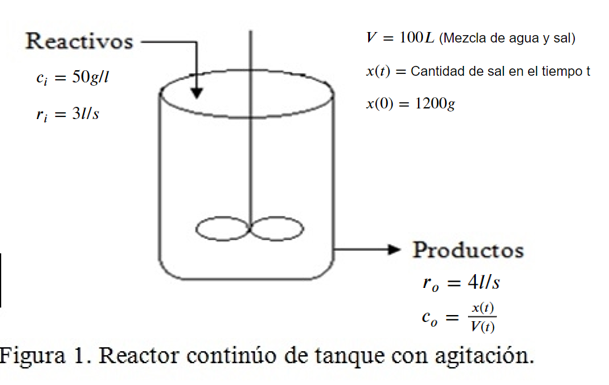

## Modelo que representa el problema

Para el análisis del reactor y el cálculo de la concentración de sal se planteó la ecuación diferencial de la siguiente forma (MateFacil, 2022):
$$\frac{dx}{dt} = c_i r_i - c_o r_o $$

Donde $c_O = \frac{x}{V}$, por lo tanto, la ecuación diferencial se puede reescribir como $$\frac{dx}{dt} = c_i r_i - r_o \frac{x}{V} $$

Declaramos las variables, como variables globales para que sea más factible no hardcodear el código, y podamos cambiar los valores de las condiciones:

In [4]:
Vo = 100
x0 = 1200
ci = 50
ri = 3
ro = 4

Se nos pide calcular lo siguiente:
* Visualizar el volumen del tanque respecto al tiempo
* Calcular la cantidad de sal que queda en el tanque después de t segundos
* El tiempo en donde hay más cantidad de sal en el tanque.

## Visualizar el volumen de la solución en el tanque respecto al tiempo

Recordemos nuestra fórmula para el volumen:

<center>$V(t) = V_o + t(r_i - r_o)$

In [5]:
def volumen(t):
    return Vo + (t*(ri - ro))

Despejamos para conocer en que tiempo nuestro tanque llega a estar vacío:

<center>$t = \frac{V(t) - Vo}{r_i - r_o}$

Esta función va a recibir como parámetro el volumen del cual queramos conocer el tiempo en el que pasó.

In [8]:
def tiempo(V):
    return (V - Vo)/(ri - ro)

Guardaremos en una variable el tiempo en que el tanque se queda vacío para dspués usarla como límite en evaluar nuestra función de volumen.

In [9]:
t_vacio = tiempo(0)

In [36]:
t_sim = np.linspace(0, t_vacio, 1000)

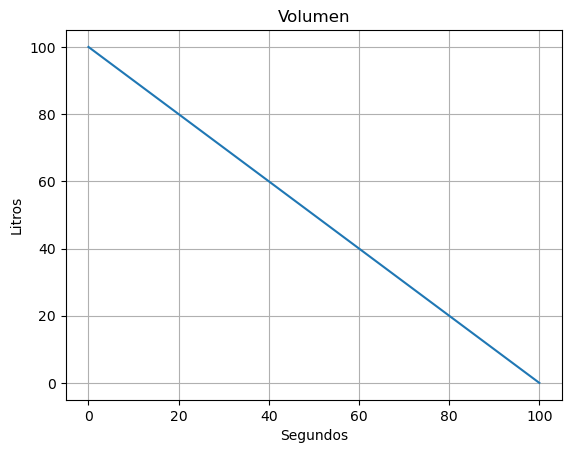

In [37]:
plt.figure()
plt.plot(t_sim, volumen(t_sim))
plt.xlabel("Segundos")
plt.ylabel("Litros")
plt.title("Volumen")
plt.grid()

Como en nuestro tanque sale más solución de la que entra, se puede deducir que nuestra gráfica tiene una pendiente negativa, es decir, nuestro volumen decrece respecto al tiempo.


**Nuestro tanque se encontrará vacío después de 100 segundos**

## Calcular la cantidad de sal que queda en el tanque después de t segundos

Recordemos nuestra fórnmula:

<center>$x' = c_i r_i - r_o c_o$
    
Como la concentración de salida ($c_o$) no es constante, se calcula de la 
siguiente manera:
    
    
<center>$c_o = \frac{x}{V(t)}$

Entonces:

<center>$x' = c_i r_i - r_o \frac{x}{V}$

In [14]:
def fun(t, x):
    return ci*ri - ro*(x/ volumen(t))

Declararmos nuestra condicion inicial:

In [15]:
x_0 = np.array([x0])

Declaramos rango de tiempo:

In [1]:
t_span = [0, t_vacio-0.00001]

NameError: name 't_vacio' is not defined

Ahora resolveremos con ayuda de Solve ivp:

In [94]:
sol = solve_ivp(fun, t_span, x_0, max_step = 0.01)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 60002
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.000000e+00, 1.000000e-02, 2.000000e-02, ..., 9.998000e+01,
       9.999000e+01, 9.999999e+01])
 t_events: None
        y: array([[1.20000000e+03, 1.20101977e+03, 1.20203909e+03, ...,
        9.99999999e-01, 4.99999999e-01, 5.00076289e-04]])
 y_events: None

Ahora graficaremos

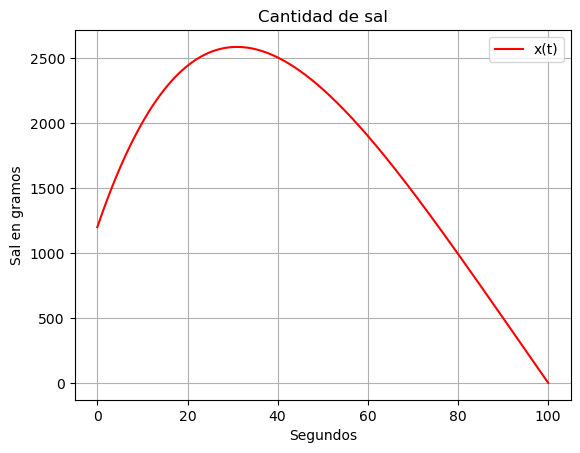

In [119]:
plt.figure()
plt.plot(sol.t, sol.y[0], "r", label = "x(t)")
plt.xlabel("Segundos")
plt.ylabel("Sal en gramos")
plt.title("Cantidad de sal")
plt.legend()
plt.grid()

Como podemos observar en nuestra gráfica se cumple nuestra condición inicial de la cantidad de sal al inicio que es de 1200g, así como también podemos observar que la cantidad de sal en el tanque es igual a 0 cuando el tanque se vacía que es en el segundo 100.

### Uso de ajuste de curvas para conocer la función que mejor describa el comportamiento

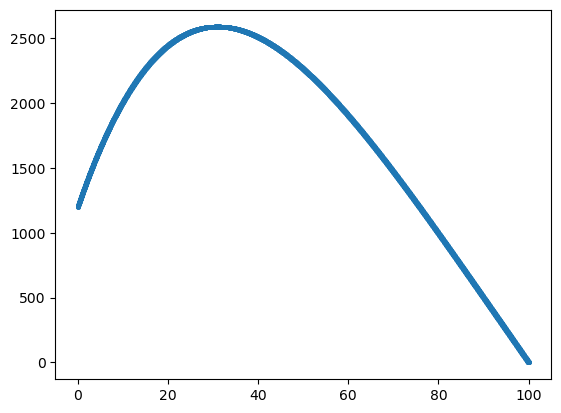

In [96]:
plt.figure()
plt.scatter(sol.t, sol.y[0], s=6)

In [97]:
def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [98]:
m = len(sol.y[0])
ones = np.ones([m, 1])

x1 = np.reshape(sol.t, [m, 1])
x2 = np.reshape(sol.t**2, [m, 1])
x3 = np.reshape(sol.t**3, [m, 1])
x4 = np.reshape(sol.t**4, [m, 1])

X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))
X4 = np.hstack((ones, x1, x2, x3, x4))

beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(3)
beta_inicial3 = np.random.rand(4)
beta_inicial4 = np.random.rand(5)

y_vector = np.reshape(sol.y[0], [m, 1])

In [99]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X2, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))
sol4 = opt.minimize(foo, beta_inicial4, args=(X4, y_vector))

Visualizaremos todas las funciones para poder seleccionar la que mejor se ajusta:

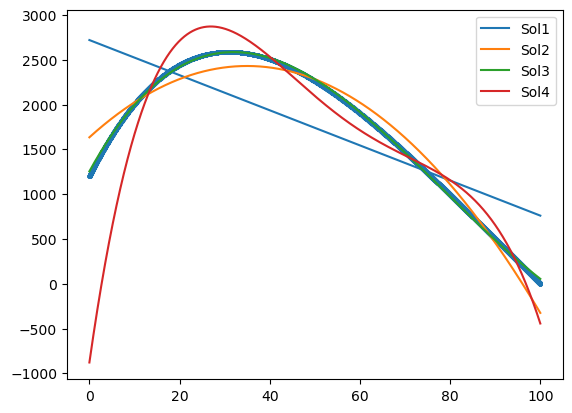

In [100]:
plt.figure()
plt.scatter(sol.t, sol.y[0], s=5)
plt.plot(sol.t, X1 @ sol1.x, label = "Sol1") 
plt.plot(sol.t, X2 @ sol2.x, label = "Sol2")
plt.plot(sol.t, X3 @ sol3.x, label = "Sol3")
plt.plot(sol.t, X4 @ sol4.x, label = "Sol4")
plt.legend()

Como podemos observar, la que mejor se adapta es la Solución de grado 3.

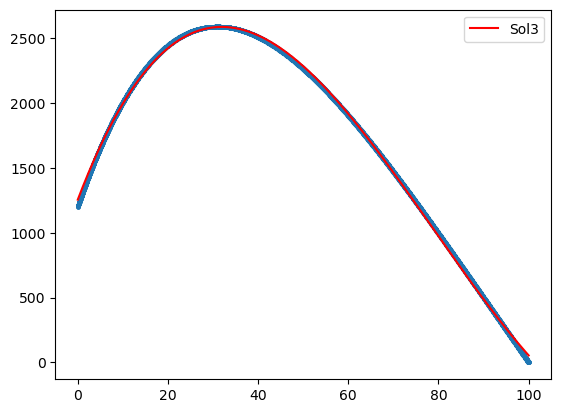

In [101]:
plt.figure()
plt.scatter(sol.t, sol.y[0], s=5)
plt.plot(sol.t, X3 @ sol3.x, "r", label = "Sol3")
plt.legend()

Ahora desarrollaremos la función:

In [102]:
sol3.x

array([ 1.25439848e+03,  9.11270131e+01, -1.79100762e+00,  7.59708327e-03])

In [111]:
def x(t):
    return sol3.x[0] + sol3.x[1]*t + sol3.x[2]*t**2 + sol3.x[3]*t**3

## El tiempo en donde hay más cantidad de sal en el tanque.

Definimos la función y la variable que utilizaremos

In [113]:
sp.var("t")
x(t)

0.00759708327342637*t**3 - 1.79100761554834*t**2 + 91.1270130646161*t + 1254.39848445882

Obtenemos la derivada de la funcion principal

In [115]:
df = sp.diff(x(t), t)
df

0.0227912498202791*t**2 - 3.58201523109669*t + 91.1270130646161

Definimos la funcion de la derivada

In [116]:
def dx(t):
    return 0.02279*t**2 - 3.58201*t + 91.12701

Obtenemos el punto crítico resolviendo la derivada de la funcion principal (x (t)) , respecto a t.

In [118]:
pc = sp.solve(dx(t), t)
pc

[31.9245471974044, 125.250090801718]

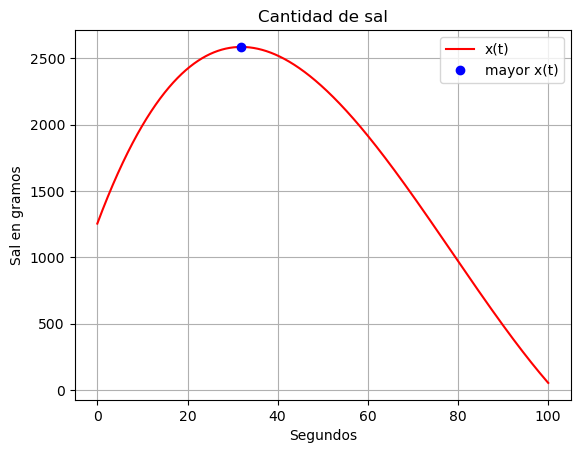

In [129]:
plt.figure()
plt.plot(sol.t, x(sol.t), "r", label = "x(t)")
plt.plot(pc[0], x(pc[0]), "ob", label = "mayor x(t)")
plt.xlabel("Segundos")
plt.ylabel("Sal en gramos")
plt.title("Cantidad de sal")
plt.legend()
plt.grid()

In [130]:
pc[0]

31.9245471974044

In [131]:
x(pc[0])

2585.41829601485

## Solución del problema

Primeramente, mediante ecuaciones diferenciales se determinó que en las condiciones de concentración y velocidad establecidas, para que la cantidad de sal en el tanque sea de 0 gramos, se requieren 100 segundos. Por otro lado, mediante regresión lineal y optimización de funcinoes, se determinó el punto en donde hay más cantidad de sal. El punto máximo de cantidad de sal en el tanque ocurre en el segundo 31.9 donde hay una cantidad de 2585.4 gramos de sal.

## Conclusiones

Utilizando ecuaciones diferenciales y herramientas tecnológicas se cumplieron los objetivos específicos. Se realizaron simulaciones con condiciones iniciales determinadas para encontrar soluciones a incógnitas en un problema de mezclas y se visualizaron correctamente las soluciones con gráficos. Finalmente, la simulación matemática es una herramienta muy útil para visualizar y encontrar soluciones a problemas de sistemas con distintos tipos de modelo matemático. En esta línea, las ecuaciones diferenciales son de gran utilidad en la ingeniería para modelar y representar sistemas con razones de cambio entre las variables y encontrar sus respectivas soluciones. 

## Referencias
- Sotomayor, V. (2021, 16 diciembre). Ecuaciones diferenciales: la herramienta que todo ingeniero debe poseer - EDEM Escuela de Empresarios. EDEM Escuela de Empresarios. https://edem.eu/ecuaciones-diferenciales-la-herramienta-que-todo-ingeniero-debe-poseer/
- Franco, O. G. (2022). Ecuaciones Diferenciales I: Ecuaciones diferenciales como modelos matemáticos. El blog de Leo. https://blog.nekomath.com/ecuaciones-diferenciales-i-ecuaciones-diferenciales-como-modelos-matematicos/
- Tenorio Villalon, A. F., Martín Caraballo, A. M., Paralera Morales, C., & Contreras Rubio, I.  (2013). Ecuaciones diferenciales y en diferencias aplicadas a los conceptos económicos y financieros. Revista de Métodos Cuantitativos para la Economía y la Empresa, 165-199.
- Laín, S., Cruz, C., Valencia, Y. C., Torres, P., & Montoya, C. (2011). DETERMINACIÓN DEL TIEMPO DE MEZCLA EN UN TANQUE DE ALMACENAMIENTO PARA AGUA POTABLE MEDIANTE DINÁMICA DE FLUIDOS COMPUTACIONAL -CFD-. Revista Ingenierías Universidad de Medellín, 10(19), 55-65. https://dialnet.unirioja.es/descarga/articulo/3846102.pdf
- MateFacil. (2022, 1 diciembre). Problema de Mezclas, Calcular la cantidad de Sal (Ecuaciones Diferenciales) [Vídeo]. YouTube. https://www.youtube.com/watch?v=Gxxpzflaomc
